In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
df = pd.read_csv("ML course notebooks/08-Linear-Regression-Models/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [31]:
# Our model's X-value (the features we will give to the model)
X = df[['TV', 'radio', 'newspaper']]
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [32]:
# Our models y-value (the feature(s) we want the model to predict) - y depends on X:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [33]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [34]:
poly_features = polynomial_converter.fit_transform(X)
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [36]:
model = LinearRegression(fit_intercept=True)

In [37]:
model.fit(X_train, y_train)

LinearRegression()

In [38]:
test_predictions = model.predict(X_test)
print(test_predictions)

[13.94856153 19.33480262 12.31928162 16.76286337  7.90210901  6.94143792
 20.13372693 17.50092709 10.56889    20.12551788  9.44614537 14.09935417
 12.05513493 23.39254049 19.67508393  9.15626258 12.1163732   9.28149557
  8.44604007 21.65588129  7.05070331 19.35854208 27.26716369 24.58689346
  9.03179421 11.81070232 20.42630125  9.19390639 12.74795186  8.64340674
  8.66294151 20.20047377 10.93673817  6.84639129 18.27939359  9.47659449
 10.34242145  9.6657038   7.43347915 11.03561332 12.65731013 10.65459946
 11.20971496  7.46199023 11.38224982 10.27331262  6.15573251 15.50893362
 13.36092889 22.71839277 10.40389682 13.21622701 14.23622207 11.8723677
 11.68463616  5.62217738 25.03778913  9.53507734 17.37926571 15.7534364 ]


In [39]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [40]:
MAE = mean_absolute_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f"{MAE=} & {RMSE=}")

MAE=0.48967980448035264 & RMSE=0.6646431757268956


In [41]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1, 10):
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)

    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))

    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

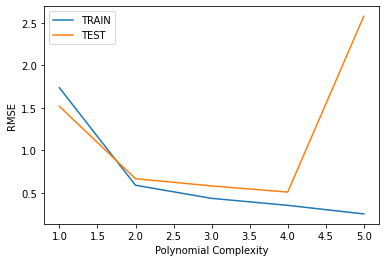

In [42]:
plt.plot(range(1, 6), train_rmse_errors[:5], label='TRAIN')
plt.plot(range(1, 6), test_rmse_errors[:5], label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

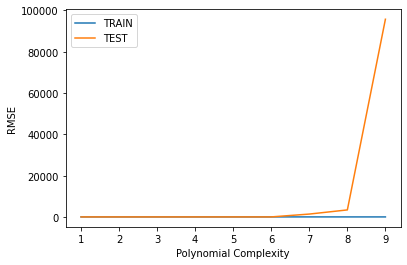

In [43]:
plt.plot(range(1, 10), train_rmse_errors, label='TRAIN')
plt.plot(range(1, 10), test_rmse_errors, label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

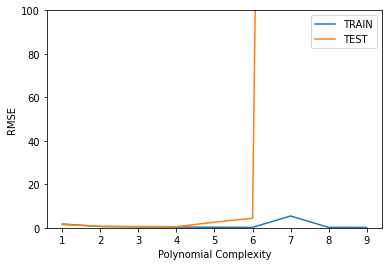

In [44]:
plt.plot(range(1, 10), train_rmse_errors, label='TRAIN')
plt.plot(range(1, 10), test_rmse_errors, label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0, 100)
plt.legend()

In [46]:
# Finalizing model choice:

# Based on our chart, could have also been degree=4, but
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [47]:
final_model = LinearRegression()

In [48]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

In [49]:
from joblib import dump, load

In [50]:
dump(final_model, 'sales_poly_model.joblib')

['sales_poly_model.joblib']

In [51]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

In [52]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [53]:
campaign_poly = loaded_poly.transform([[149, 22, 12]])
campaign_poly

C:\Users\Hum\PycharmProjects\ml_course\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [54]:
final_model.predict(campaign_poly)

array([14.64501014])